In [93]:
import numpy as np
import random 
import matplotlib.pyplot as plt

# Random walk of an ant in two dimensions

## 1/ First question : average number of steps before reaching a first defined closed space around the anthill

In [88]:
def random_walk():
    n = 0
    (x,y) = (0,0)
    l_x, l_y = [0], [0]
    
    while abs(x)<2 and abs(y)<2:
        
        i = random.randint(1,4)
        if i == 1:
            x +=1
        if i == 2:
            x -=1            
        if i == 3:
            y +=1
        if i == 4:
            y -=1
    
        n +=1
        #plt.xlim(-3,3)
        #plt.ylim(-3,3)
        l_x.append(x)
        l_y.append(y)
        #plt.plot(l_x,l_y,'+')
        #plt.pause(1)
        
    return n, l_x,l_y

In [91]:
def average_random_walk(n):
    l = np.array([0]*n)
    for i in range(n):
        l[i] = random_walk()[0]
    return l.mean()

In [119]:
average_random_walk(500000)

4.494766

***Remark*** : It corresponds to the mathematical result found. 

## 2/ Second question : average number of steps needed to reach a line in which the food is located.

In [105]:
def random_walk_2():
    n = 0
    (x,y) = (0,0)
    l_x, l_y = [0], [0]
    
    while y != 1-x:
        
        i = random.randint(1,4)
        if i == 1:
            x +=1
        if i == 2:
            x -=1            
        if i == 3:
            y +=1
        if i == 4:
            y -=1
    
        n +=1
        #plt.xlim(-3,3)
        #plt.ylim(-3,3)
        l_x.append(x)
        l_y.append(y)
        #plt.plot(l_x,l_y,'+')
        #plt.pause(1)
        
    return n, l_x,l_y

In [121]:
def average_random_walk_2(n):
    l = np.array([0]*n)
    maximum =0
    for i in range(n):
        r = random_walk_2()[0]
        l[i] = r
        if r > maximum :
            maximum = r
    return l.mean(), maximum

In [125]:
average_random_walk_2(200)

(1567.2, 290291)

***Remark*** : Some cases need many operations to converge. On average, it diverges to + $\infty$ as we showed mathematically.

## 3/ Third question : average number of steps before reaching food located on a closed boundary around the anthill 

**Method** : Given a function *boundary(x,y)* which returns True if the ant is in the closed space, we are trying to approximate the number of steps necessary to reach food i.e to reach the boundary of the closed space. 

Basically, the ant reach food once it is on the boundary or outside (which means she reached it when she walked from the previous position). 

### Shape of the boundary

In [ ]:
from math import sqrt

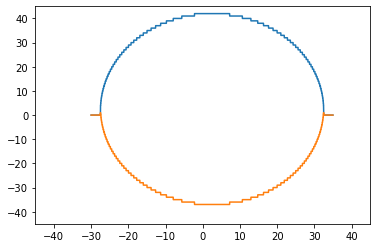

In [202]:
X = np.linspace(-30,35,10000)
Y_1 = np.array([0]*10000)
Y_2 = np.array([0]*10000)

for i in range(10000):
    if (X[i]-2.5)**2 < 900:
        Y_1[i] = 2.5 + 40*sqrt((1-((X[i]-2.5)/30)**2))
        Y_2[i] = 2.5 - 40*sqrt((1-((X[i]-2.5)/30)**2))

plt.xlim(-45,45)
plt.ylim(-45,45)
plt.plot(X,Y_1)
plt.plot(X,Y_2)

### Boundary function

In [206]:
def boundary(x,y):
    if ((x-2.5)/30)**2+((y-2.5)/40)**2 < 1:
        return True 

*Remark* : We can adapt it easily to a new space in 2D (if we have an equation).

### Simulation of one random walk before reaching food

In [207]:
def random_walk_3():
    n = 0
    (x,y) = (0,0)
 
    while boundary(x,y) == True :
        
        i = random.randint(1,4)
        if i == 1:
            x +=10
        if i == 2:
            x -=10           
        if i == 3:
            y +=10
        if i == 4:
            y -=10
    
        n +=1
        
    return n

### Simulation of n random walks 

In [209]:
def average_random_walk_3(n):
    l = np.array([0]*n)
    for i in range(n):
        l[i] = random_walk_3()
    return l.mean()

In [210]:
average_random_walk_3(100000)

13.96178

**Conclusion** : We find that, on average, it requires $14$ steps to reach food.